# 1. 기본자료구인 Tensor

텐서플로는 텐서라는 기본 자료구조로 모든 데이터를 표현합니다. 텐서는 동적 크기를 갖는 다차원 데이터 배열로 볼 수 있습니다. bolean, string, int, float과 같은 불린, 문자열, 여러 숫자와 같은 정적 자료형을 가집니다. 


각 텐서는 배열의 차원을 나타내는 랭크(rank)를 가집니다. 

In [ ]:
# rank가 2인 텐서
t=[[1,2,3],[4,5,6],[7,8,9]] 

텐서플로우 공식 문서에는 텐서의 차원을 나타내기 위해 구조(shape), 랭크(rank), 차원번호(dimession number) 용어를 사용합니다. (자세한 설명은 텐서플로우 메뉴얼 참조)

# 2. K-meand algorithm(K-평균 알고리즘)

군집화 문제를 풀기 위한 자율 학습 알고리즘의 일종입니다. 즉, 군집화 문제를 풀기위해 적합한 것으로 주어진 데이터를 군집 갯수(K)로 그룹화 합니다. 군집되어 있는 데이터끼리는 같은 성질을 가지며 다른 그룹과는 구별됩니다. 그러므로 한 군집 내의 원소들은 군집 밖의 데이터보다 서로 더 닮아 있습니다. 

## 2-1. 샘플 데이터 생성

2D 좌표계에 2,000개의 랜덤한 점을 생성합니다.

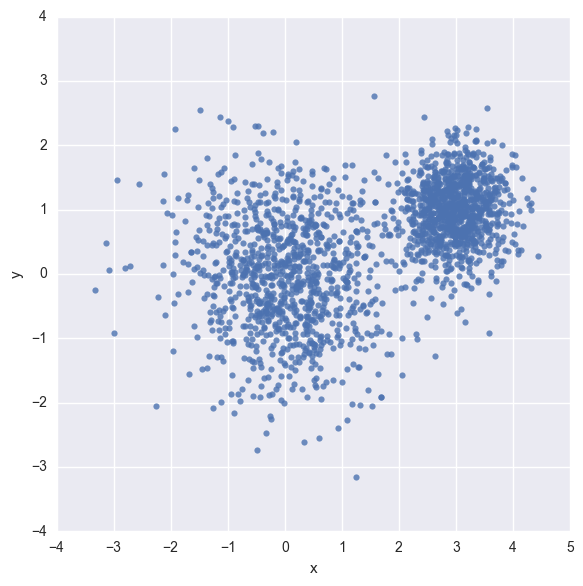

In [1]:
import numpy as np

num_points = 2000
vectors_set = []

for i in range(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9),
                            np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0, 0.5),
                            np.random.normal(1.0, 0.5)])
        
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 

df = pd.DataFrame({"x": [v[0] for v in vectors_set],"y": [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

## 2-2. 4개의 군집으로 그룹화하기


In [2]:
import tensorflow as tf

# 위에서 무작위로 생성한 데이터를 가지고 상수 텐서를 만듭니다.
vectors = tf.constant(vectors_set)

# 0단계 : K개 중심의 초기 집합을 결정합니다.
# tf.slice : 텐서의 일부분을 삭제합니다.
# tf.random_shuffle : 첫 번째 차원을 기준으로 텐서의 원소를 섞습니다.
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0],[k,-1]))

# 아래 tf.sub를 계산하기 위해 차원을 추가하는 과정입니다.
# tf.expand_dims : 텐서에 차원을 추가
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

# 1단계 : 각 데이터를 가장 가까운 군집에 할당
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)

# 2단계 : 각 그룹에 대해 새로운 중심을 계산
# tf.reshape : 텐서의 원소는 그대로 유지하면서 텐서의 구조를 바꿉니다.
means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors,\
                                               tf.reshape(tf.where(tf.equal(assignments,c)), [1,-1])),\
                                     reduction_indices=[1]) for c in range(k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)


for step in range(100):
    _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])
    
#그래프로 표현하기
data = {"x": [], "y": [], "cluster": []}

for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)

plt.show()

TypeError: Expected int32, got list containing Tensors of type '_Message' instead.

# 참고자료

타이틀,저자(번역),자료명,출처(출판사)
1. 모두의 머신러닝,김성훈,선형회귀 분석,https://hunkim.github.io/ml/
2. 임베디드 개발자의 TensorFlow 학습하기,jybaek,선형회귀 분석,https://www.gitbook.com/book/jybaek/ml/details
3. 텐서플로 첫걸음,조로디토레스(박해선),회귀분석,한빛미디어